In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## 读入数据集

In [2]:
D1 = pd.read_csv("D1.data",header=None)
D2 = pd.read_csv("D2.data",header=None)
D1.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
D2.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [6]:
D1_X = D1.iloc[:, 0:4]
D1_y = D1.iloc[:, 4]
D2_X = D2.iloc[:, 2:]
D2_y = D2.iloc[:, 1]

## 划分训练集和测试集

In [7]:
D1_X_train, D1_X_test, D1_y_train, D1_y_test = train_test_split(D1_X, D1_y, test_size=0.3)
D2_X_train, D2_X_test, D2_y_train, D2_y_test = train_test_split(D2_X, D2_y, test_size=0.3)

## 引入模型并训练

In [26]:
clf_rf = RandomForestClassifier(n_estimators=25, bootstrap=True)
clf_adb = AdaBoostClassifier(base_estimator=None, n_estimators=25, learning_rate=1.0, algorithm='SAMME.R')

In [27]:
clf_rf.fit(D1_X_train, D1_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
clf_adb.fit(D1_X_train, D1_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=25, random_state=None)

In [29]:
D1_y_predict_rf = clf_rf.predict(D1_X_test)
D1_score_rf = clf_rf.score(D1_X_test, D1_y_test)
D1_pre_mac_rf = metrics.precision_score(D1_y_test, D1_y_predict_rf, average='macro')
D1_pre_mic_rf = metrics.precision_score(D1_y_test, D1_y_predict_rf, average='micro')
D1_recall_mac_rf = metrics.recall_score(D1_y_test, D1_y_predict_rf, average='macro')
D1_recall_mic_rf = metrics.recall_score(D1_y_test, D1_y_predict_rf, average='micro')
D1_F1m_mac_rf = metrics.f1_score(D1_y_test, D1_y_predict_rf, average='macro')
D1_F1m_mic_rf = metrics.f1_score(D1_y_test, D1_y_predict_rf, average='micro')
D1_cfm_rf = confusion_matrix(D1_y_test, D1_y_predict_rf)
print("随机森林模型在数据集D1上的准确率为：", D1_score_rf)
print("随机森林模型在数据集D1上的宏平均精确率为：", D1_pre_mac_rf)
print("随机森林模型在数据集D1上的微平均精确率为：", D1_pre_mic_rf)
print("随机森林模型在数据集D1上的宏平均召回率为：", D1_recall_mac_rf)
print("随机森林模型在数据集D1上的微平均召回率为：", D1_recall_mic_rf)
print("随机森林模型在数据集D1上的宏平均F1_score为：", D1_F1m_mac_rf)
print("随机森林模型在数据集D1上的微平均F1_score为：", D1_F1m_mic_rf)
print("随机森林模型在数据集D1上的混淆矩阵为：\n", D1_cfm_rf)

随机森林模型在数据集D1上的准确率为： 0.9111111111111111
随机森林模型在数据集D1上的宏平均精确率为： 0.9125
随机森林模型在数据集D1上的微平均精确率为： 0.9111111111111111
随机森林模型在数据集D1上的宏平均召回率为： 0.9188034188034188
随机森林模型在数据集D1上的微平均召回率为： 0.9111111111111111
随机森林模型在数据集D1上的宏平均F1_score为： 0.9131652661064426
随机森林模型在数据集D1上的微平均F1_score为： 0.9111111111111111
随机森林模型在数据集D1上的混淆矩阵为：
 [[14  0  0]
 [ 0 12  1]
 [ 0  3 15]]


In [30]:
D1_y_predict_adb = clf_adb.predict(D1_X_test)
D1_score_adb = clf_adb.score(D1_X_test, D1_y_test)
D1_pre_mac_adb = metrics.precision_score(D1_y_test, D1_y_predict_adb, average='macro')
D1_pre_mic_adb = metrics.precision_score(D1_y_test, D1_y_predict_adb, average='micro')
D1_recall_mac_adb = metrics.recall_score(D1_y_test, D1_y_predict_adb, average='macro')
D1_recall_mic_adb = metrics.recall_score(D1_y_test, D1_y_predict_adb, average='micro')
D1_F1m_mac_adb = metrics.f1_score(D1_y_test, D1_y_predict_adb, average='macro')
D1_F1m_mic_adb = metrics.f1_score(D1_y_test, D1_y_predict_adb, average='micro')
D1_cfm_adb = confusion_matrix(D1_y_test, D1_y_predict_adb)
print("Adabost模型在数据集D1上的准确率为：", D1_score_adb)
print("Adabost模型在数据集D1上的宏平均精确率为：", D1_pre_mac_adb)
print("Adabost模型在数据集D1上的微平均精确率为：", D1_pre_mic_adb)
print("Adabost模型在数据集D1上的宏平均召回率为：", D1_recall_mac_adb)
print("Adabost模型在数据集D1上的微平均召回率为：", D1_recall_mic_adb)
print("Adabost模型在数据集D1上的宏平均F1_score为：", D1_F1m_mac_adb)
print("Adabost模型在数据集D1上的微平均F1_score为：", D1_F1m_mic_adb)
print("Adabost模型在数据集D1上的混淆矩阵为：\n", D1_cfm_adb)

Adabost模型在数据集D1上的准确率为： 0.8222222222222222
Adabost模型在数据集D1上的宏平均精确率为： 0.873015873015873
Adabost模型在数据集D1上的微平均精确率为： 0.8222222222222222
Adabost模型在数据集D1上的宏平均召回率为： 0.8518518518518517
Adabost模型在数据集D1上的微平均召回率为： 0.8222222222222222
Adabost模型在数据集D1上的宏平均F1_score为： 0.8263305322128852
Adabost模型在数据集D1上的微平均F1_score为： 0.8222222222222222
Adabost模型在数据集D1上的混淆矩阵为：
 [[14  0  0]
 [ 0 13  0]
 [ 0  8 10]]


In [31]:
clf_rf.fit(D2_X_train, D2_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
clf_adb.fit(D2_X_train, D2_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=25, random_state=None)

In [33]:
D2_y_predict_rf = clf_rf.predict(D2_X_test)
D2_score_rf = clf_rf.score(D2_X_test, D2_y_test)
D2_pre_mac_rf = metrics.precision_score(D2_y_test, D2_y_predict_rf, average='macro')
D2_pre_mic_rf = metrics.precision_score(D2_y_test, D2_y_predict_rf, average='micro')
D2_recall_mac_rf = metrics.recall_score(D2_y_test, D2_y_predict_rf, average='macro')
D2_recall_mic_rf = metrics.recall_score(D2_y_test, D2_y_predict_rf, average='micro')
D2_F1m_mac_rf = metrics.f1_score(D2_y_test, D2_y_predict_rf, average='macro')
D2_F1m_mic_rf = metrics.f1_score(D2_y_test, D2_y_predict_rf, average='micro')
D2_cfm_rf = confusion_matrix(D2_y_test, D2_y_predict_rf)
print("随机森林模型在数据集D2上的准确率为：", D2_score_rf)
print("随机森林模型在数据集D2上的宏平均精确率为：", D2_pre_mac_rf)
print("随机森林模型在数据集D2上的微平均精确率为：", D2_pre_mic_rf)
print("随机森林模型在数据集D2上的宏平均召回率为：", D2_recall_mac_rf)
print("随机森林模型在数据集D2上的微平均召回率为：", D2_recall_mic_rf)
print("随机森林模型在数据集D2上的宏平均F1_score为：", D2_F1m_mac_rf)
print("随机森林模型在数据集D2上的微平均F1_score为：", D2_F1m_mic_rf)
print("随机森林模型在数据集D2上的混淆矩阵为：\n", D2_cfm_rf)

随机森林模型在数据集D2上的准确率为： 0.9590643274853801
随机森林模型在数据集D2上的宏平均精确率为： 0.9631541725601132
随机森林模型在数据集D2上的微平均精确率为： 0.9590643274853801
随机森林模型在数据集D2上的宏平均召回率为： 0.9547916666666667
随机森林模型在数据集D2上的微平均召回率为： 0.9590643274853801
随机森林模型在数据集D2上的宏平均F1_score为： 0.9580955715035884
随机森林模型在数据集D2上的微平均F1_score为： 0.9590643274853801
随机森林模型在数据集D2上的混淆矩阵为：
 [[95  1]
 [ 6 69]]


In [34]:
D2_y_predict_adb = clf_adb.predict(D2_X_test)
D2_score_adb = clf_adb.score(D2_X_test, D2_y_test)
D2_pre_mac_adb = metrics.precision_score(D2_y_test, D2_y_predict_adb, average='macro')
D2_pre_mic_adb = metrics.precision_score(D2_y_test, D2_y_predict_adb, average='micro')
D2_recall_mac_adb = metrics.recall_score(D2_y_test, D2_y_predict_adb, average='macro')
D2_recall_mic_adb = metrics.recall_score(D2_y_test, D2_y_predict_adb, average='micro')
D2_F1m_mac_adb = metrics.f1_score(D2_y_test, D2_y_predict_adb, average='macro')
D2_F1m_mic_adb = metrics.f1_score(D2_y_test, D2_y_predict_adb, average='micro')
D2_cfm_adb = confusion_matrix(D2_y_test, D2_y_predict_adb)
print("Adabost模型在数据集D2上的准确率为：", D2_score_adb)
print("Adabost模型在数据集D2上的宏平均精确率为：", D2_pre_mac_adb)
print("Adabost模型在数据集D2上的微平均精确率为：", D2_pre_mic_adb)
print("Adabost模型在数据集D2上的宏平均召回率为：", D2_recall_mac_adb)
print("Adabost模型在数据集D2上的微平均召回率为：", D2_recall_mic_adb)
print("Adabost模型在数据集D2上的宏平均F1_score为：", D2_F1m_mac_adb)
print("Adabost模型在数据集D2上的微平均F1_score为：", D2_F1m_mic_adb)
print("Adabost模型在数据集D2上的混淆矩阵为：\n", D2_cfm_adb)

Adabost模型在数据集D2上的准确率为： 0.9649122807017544
Adabost模型在数据集D2上的宏平均精确率为： 0.9705882352941176
Adabost模型在数据集D2上的微平均精确率为： 0.9649122807017544
Adabost模型在数据集D2上的宏平均召回率为： 0.96
Adabost模型在数据集D2上的微平均召回率为： 0.9649122807017544
Adabost模型在数据集D2上的宏平均F1_score为： 0.9640151515151516
Adabost模型在数据集D2上的微平均F1_score为： 0.9649122807017544
Adabost模型在数据集D2上的混淆矩阵为：
 [[96  0]
 [ 6 69]]


## 性能比较

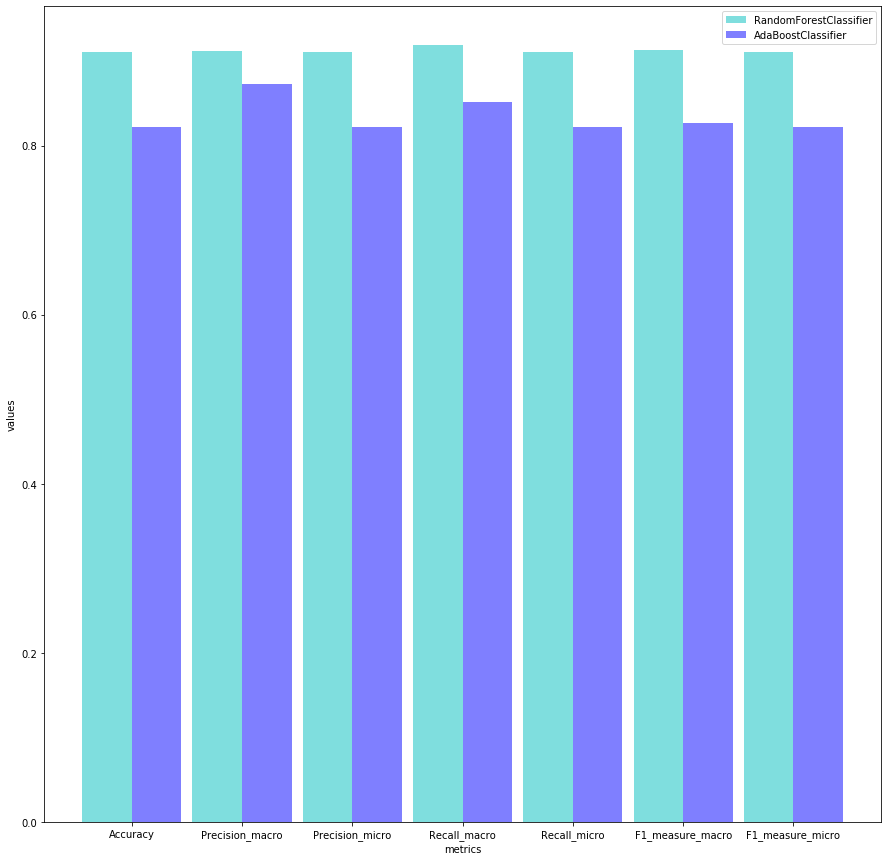

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 15))
D1_x = np.arange(7)
D1_y1 = [D1_score_rf, D1_pre_mac_rf, D1_pre_mic_rf, D1_recall_mac_rf, D1_recall_mic_rf, D1_F1m_mac_rf, D1_F1m_mic_rf]
D1_y2 = [D1_score_adb, D1_pre_mac_adb, D1_pre_mic_adb, D1_recall_mac_adb, D1_recall_mic_adb, D1_F1m_mac_adb, D1_F1m_mic_adb]

bar_width = 0.45
tick_label = ["Accuracy", "Precision_macro", "Precision_micro", "Recall_macro", "Recall_micro", "F1_measure_macro", "F1_measure_micro"]

plt.bar(D1_x, D1_y1, bar_width, align="center", color="c", label="RandomForestClassifier", alpha=0.5)
plt.bar(D1_x+bar_width, D1_y2, bar_width, color="b", align="center", label="AdaBoostClassifier", alpha=0.5)

plt.xlabel("metrics")
plt.ylabel("values")

plt.xticks(D1_x+bar_width/2, tick_label)

plt.legend()
plt.savefig('./D1_rf_adb.svg')
plt.show()

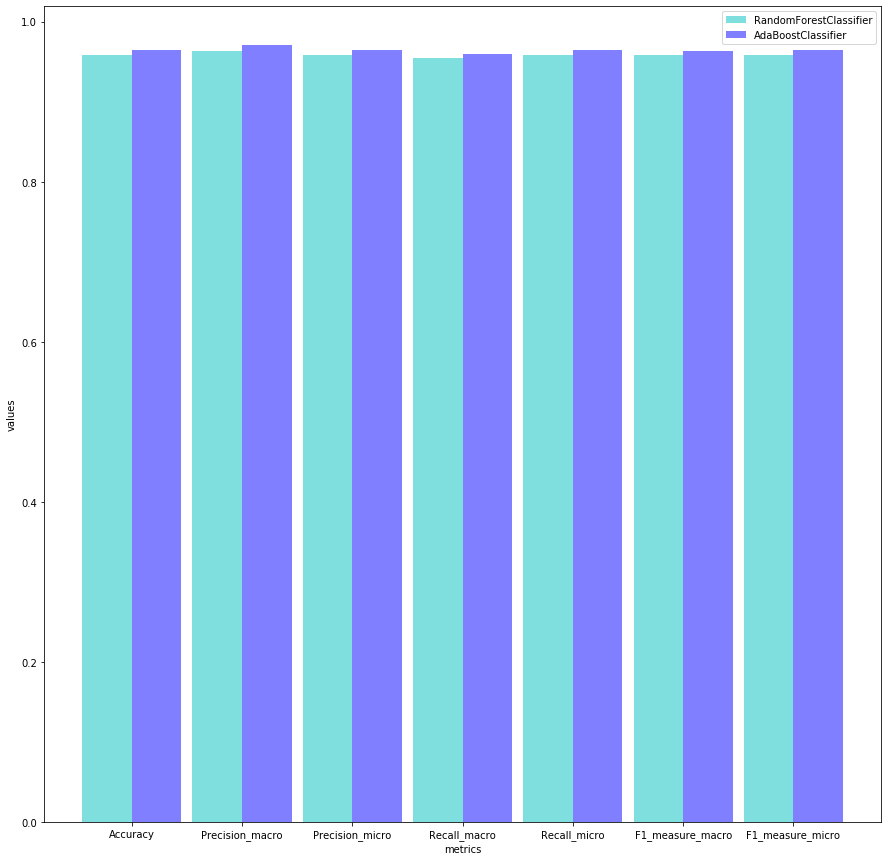

In [39]:
plt.figure(figsize=(15, 15))
D2_x = np.arange(7)
D2_y1 = [D2_score_rf, D2_pre_mac_rf, D2_pre_mic_rf, D2_recall_mac_rf, D2_recall_mic_rf, D2_F1m_mac_rf, D2_F1m_mic_rf]
D2_y2 = [D2_score_adb, D2_pre_mac_adb, D2_pre_mic_adb, D2_recall_mac_adb, D2_recall_mic_adb, D2_F1m_mac_adb, D2_F1m_mic_adb]

bar_width = 0.45
tick_label = ["Accuracy", "Precision_macro", "Precision_micro", "Recall_macro", "Recall_micro", "F1_measure_macro", "F1_measure_micro"]

plt.bar(D2_x, D2_y1, bar_width, align="center", color="c", label="RandomForestClassifier", alpha=0.5)
plt.bar(D2_x+bar_width, D2_y2, bar_width, color="b", align="center", label="AdaBoostClassifier", alpha=0.5)

plt.xlabel("metrics")
plt.ylabel("values")

plt.xticks(D2_x+bar_width/2, tick_label)

plt.legend()
plt.savefig('./D2_rf_adb.svg')
plt.show()